# Exploratory Analysis Kiva Data

As always, at the beginning of our notebook let us import all of our libraries.

In [33]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import seaborn
pd.options.display.mpl_style = 'default'

# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

/Users/Sara/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 80)

Our main data set is our loans_full.csv. Let us import it and get a feel for the data.

In [35]:
data_path = '~/intro_course_data_science_for_good/data'

## Loans data set

In [104]:
loans_full=pd.read_csv(data_path+'/loans_full.csv', low_memory=False)
loans_details=pd.read_csv(data_path+'/loans_details.csv', low_memory=False)

In [105]:
additional_columns = loans_full.columns.difference(loans_details.columns).tolist() + ['id']

In [106]:
print(additional_columns)

['borrower_count', 'id']


In [107]:
df = loans_details.merge(loans_full[['borrower_count', 'id']], left_on='id', right_on='id')

In [108]:
loan_partner_details=pd.read_csv(data_path+'/loans_partner_details.csv', low_memory=False)

new_names = [(i,'partner_'+i) for i in loan_partner_details.iloc[:, 1:].columns.values]
loan_partner_details.rename(columns = dict(new_names), inplace=True)

additional_columns = loan_partner_details.columns.difference(df.columns).tolist() + ['partner_id']

df = df.merge(loan_partner_details[['partner_average_loan_size_percent_per_capita_income', 
                                    'partner_charges_fees_and_interest', 'partner_countries', 
                                    'partner_currency_exchange_loss_rate', 'partner_default_rate', 
                                    'partner_default_rate_note', 'partner_delinquency_rate', 'partner_delinquency_rate_note', 
                                    'partner_image.id', 'partner_image.template_id', 'partner_loans_at_risk_rate', 'partner_loans_posted', 
                                    'partner_name', 'partner_portfolio_yield', 'partner_portfolio_yield_note', 'partner_profitability', 
                                    'partner_rating', 'partner_social_performance_strengths', 'partner_start_date', 'partner_status', 
                                    'partner_total_amount_raised', 'partner_url', 'partner_id']], left_on='partner_id', right_on='partner_id') 


In [109]:
df.head(2)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272,1,21.165398,1948,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375,http://www.eclof-kenya.org/
1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272,1,21.165398,1948,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375,http://www.eclof-kenya.org/


In the command below we find out the number of rows by taking the length of the index.

In [9]:
len(df.index)

127958

We can do the prior step in a quicker way using the shape function, which gives us the number of rows and columns.

In [10]:
df.shape

(127958, 54)

In the cell below, we look at 3 randomly selected rows from our KIVA dataset.

In [134]:
df.head()

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386,[],2017-06-08T00:40:03Z,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272,1,21.165398,1948,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375,http://www.eclof-kenya.org/
1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386,[],2017-06-08T00:30:05Z,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272,1,21.165398,1948,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375,http://www.eclof-kenya.org/
2,3,Used Clothing,0.0,False,"[{'first_name': 'Jane', 'last_name': '', 'gend...",NaN,['en'],"Jane was born in the 1980, and she is happily ...",NaN,NaN,NaN,0,NaN,1291525,2515986,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Jane,386,[],2017-06-08T00:20:04Z,2017-05-09T00:20:04Z,Clothing,fundraising,[{'name': '#Eco-friendly'}],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-08T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,14,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,892591.0,to buy more clothes to meet the needs and tast...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272,1,21.165398,1948,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 

In [12]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127958 entries, 0 to 127957
Data columns (total 54 columns):
Unnamed: 0                                              127958 non-null int64
activity                                                127958 non-null object
basket_amount                                           944 non-null float64
bonus_credit_eligibility                                127958 non-null bool
borrowers                                               127958 non-null object
currency_exchange_loss_amount                           24808 non-null float64
description.languages                                   127958 non-null object
description.texts.en                                    123630 non-null object
description.texts.es                                    3 non-null object
description.texts.fr                                    3 non-null object
description.texts.ru                                    4 non-null object
funded_amount                           

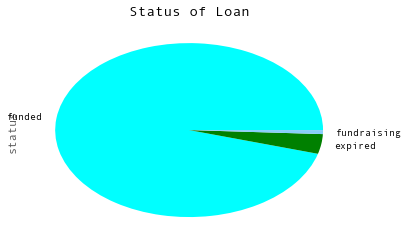

In [15]:
colors = ['aqua', 'green', 'lightskyblue', 'indigo','blue','white']
df['status'].value_counts().plot(kind='pie',title='Status of Loan',colors=colors)

plt.title('Status of Loan')

plt.show()

What is the [unique](https://en.wikipedia.org/wiki/Unique_key) key to our data set? For loans_full, each loan is a line and the id column contains no duplicates because each loan is unique. This makes the loan column the unique key.

We can use the code below to confirm that id contains no duplicates. When we sum the rows we have identified as duplicate, we should get a sum=0.

In [13]:
df['is_duplicated'] = loans_full.duplicated(['id'])
df['is_duplicated'].sum()

29

We will be playing with the time the loan was posted and the time it expires. In order to use date variables, python needs to recognize it as a date type. We can check for that below using the `dtype` command. It looks like python imported both these columns as `O` which means an object or string. We need to change this.

## Feature Engineering (creating new fields)

What is feature engineering? Add additional detail here.

### What time range do we have data for?

In [15]:
df['posted_date'].dtype
df['funded_date'].dtype
df['planned_expiration_date'].dtype

dtype('O')

dtype('O')

dtype('O')

We use the panda function `to_datetime`, which converts our format from object to datetime. You can run the `.dtype` command above to verify we have converted successfully. We also want to create a YY-MM variable for each, which will allow us to more easily aggregate our data later in the module.

In [28]:
df['posted_datetime'] = pd.to_datetime(df['posted_date'])
df['planned_expiration_datetime'] = pd.to_datetime(df['planned_expiration_date'])
df['funded_datetime'] = pd.to_datetime(df['funded_date'])
df['dispursal_datetime'] = pd.to_datetime(df['terms.disbursal_date'])
df['number_of_loans']=1

In [30]:
df['posted_date']=df['posted_datetime'].dt.date
df['planned_expiration_date']=df['planned_expiration_datetime'].dt.date
df['funded_date']=df['funded_datetime'].dt.date
df['dispersal_date']=df['dispursal_datetime'].dt.date
df['posted_year']=df['posted_datetime'].dt.year

In [25]:
df['time_to_fulfill_loan']=(df['funded_date']-df['posted_date']).dt.days

In [26]:
df['time_to_fulfill_loan'].describe()

count    122331.000000
mean          8.103277
std          12.430240
min        -441.000000
25%           0.000000
50%           2.000000
75%          14.000000
max         128.000000
Name: time_to_fulfill_loan, dtype: float64

In [31]:
df['time_to_disberse_loan']=(df['dispersal_date']-df['posted_date']).dt.days

In [32]:
df['time_to_disberse_loan'].describe()

count    127943.000000
mean         -9.953511
std          21.019553
min        -427.000000
25%         -23.000000
50%         -13.000000
75%          -4.000000
max         182.000000
Name: time_to_disberse_loan, dtype: float64

In [79]:
df['number_of_loans']=1

,number_of_loans,Date
0,511,2006
1,2143,2007
2,384,2008
3,1730,2009
4,6050,2010
5,13182,2011
6,16054,2012
7,16228,2013
8,19222,2014
9,22594,2015


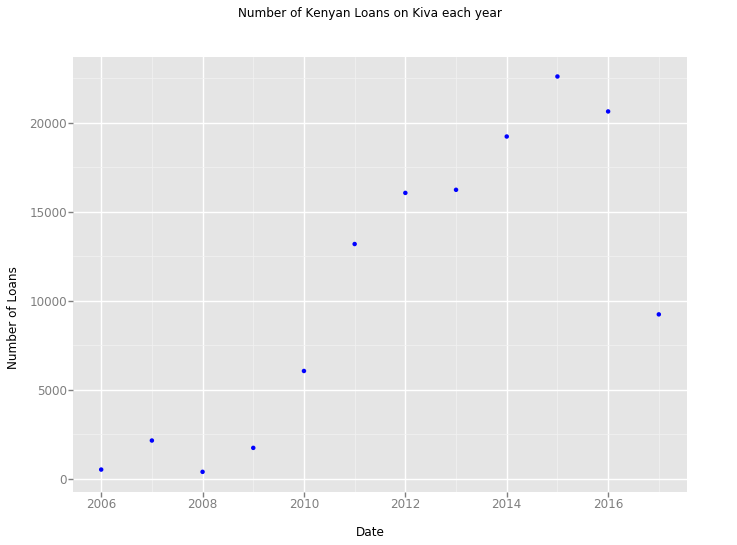

<ggplot: (-9223372036565143990)>

In [80]:
ts=df[['posted_datetime','number_of_loans']]
ts = ts.set_index(['posted_datetime'])
ts=ts.groupby(ts.index.year).sum()
ts['Date'] = ts.index
ts.reset_index(drop=True)

ggplot(ts , aes(x = 'Date', y = 'number_of_loans')) + geom_point(color = "blue") + \
ggtitle("Number of Kenyan Loans on Kiva each year") + xlab("Date") + ylab("Number of Loans")

,loan_amount,Date
0,274975,2006
1,1172000,2007
2,364500,2008
3,788150,2009
4,2985625,2010
5,5788500,2011
6,7163925,2012
7,8973675,2013
8,9196175,2014
9,9638775,2015


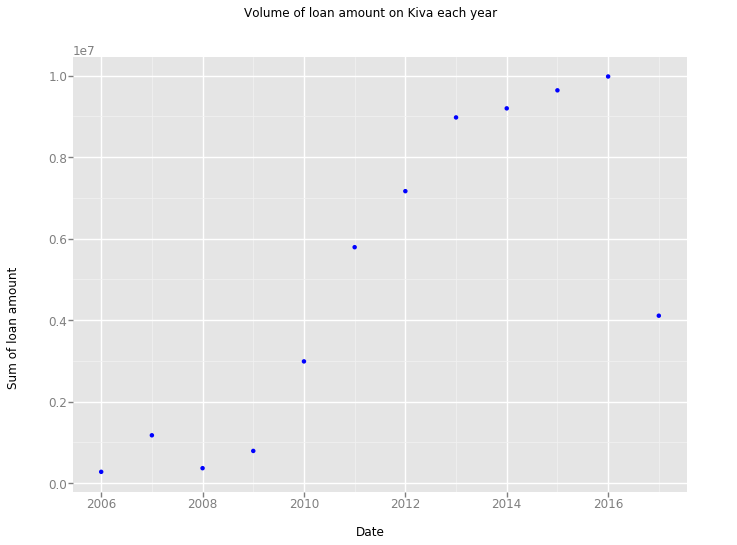

<ggplot: (-9223372036568782746)>

In [24]:
ts=df[['posted_datetime','loan_amount']]
ts = ts.set_index(['posted_datetime'])
ts=ts.groupby(ts.index.year).sum()
ts['Date'] = ts.index
ts.reset_index(drop=True)

ggplot(ts , aes(x = 'Date', y = 'loan_amount')) + geom_point(color = "blue") + \
ggtitle("Volume of loan amount on Kiva each year") + xlab("Date") + ylab("Sum of loan amount")

### Looking at sector and activity

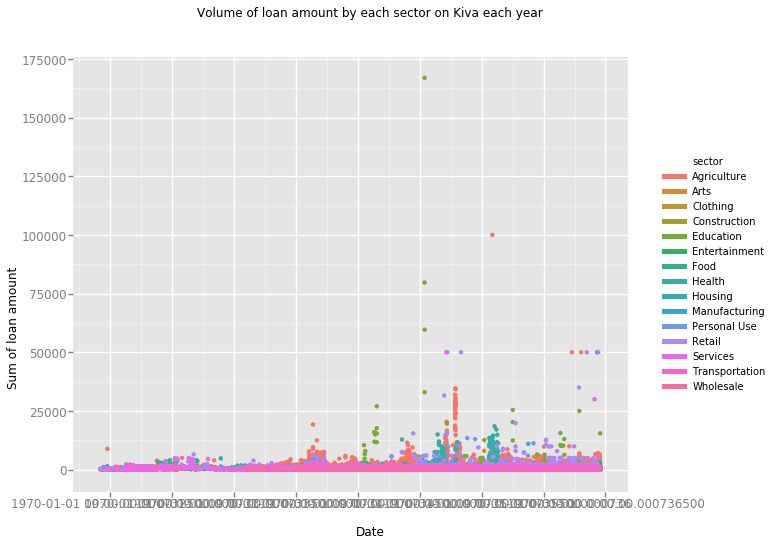

<ggplot: (287984946)>

In [26]:
ts=df['loan_amount'].groupby([df['posted_datetime'],df['sector']]).sum().reset_index()


ggplot(ts , aes(x = 'posted_datetime', y = 'loan_amount', color='sector')) + geom_point() + \
ggtitle("Volume of loan amount by each sector on Kiva each year") + xlab("Date") + ylab("Sum of loan amount")

In [ ]:
ts=df['loan_amount'].groupby([df['posted_datetime'],df['partner_id']]).sum().reset_index()


ggplot(ts , aes(x = 'posted_datetime', y = 'loan_amount', color='sector')) + geom_point() + \
ggtitle("Volume of loan amount by each sector on Kiva each year") + xlab("Date") + ylab("Sum of loan amount")

## From the chart above we appear to have outliers, let's take a closer look.

In [110]:
# Calculate Outliers
outliers=df[~(((df['loan_amount']-df['loan_amount'].mean())/(df['loan_amount'].std())).abs()<3)] 

In [111]:
len(outliers.index)

760

In [112]:
outliers.head(2)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
2446,76,Cereals,0.0,False,"[{'first_name': 'Emmy', 'last_name': '', 'gend...",NaN,['en'],Emmy would be characterized by her neighbours ...,NaN,NaN,NaN,0,NaN,1290670,2514887,1,0,0,0,2825,Kenya,KE,town,1 38,point,Bomet,Emmy,156,[],2017-06-06T21:10:03Z,2017-05-07T21:10:03Z,Food,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",290000.0,KES,2017-04-29T07:00:00Z,2825,"[{'due_date': '2017-05-29T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,20,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,NaN,NaN,to buy cereals.,NaN,NaN,NaN,NaN,1,49.6,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.431935,2.575299,NaN,2.536684,NaN,1834079,1,24.200354,18150,Juhudi Kilimo,33.0,NaN,-7.1,2.0,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2010-01-15T20:20:17Z,active,7705925,http://www.juhudikilimo.com/
2665,724,Higher education costs,NaN,False,"[{'first_name': 'Emma', 'last_name': '', 'gend...",NaN,['en'],"Greetings from Nairobi, Kenya! <br /><br />Thi...",NaN,NaN,NaN,3375,2017-05-01T14:38:23Z,1283742,2505410,1,0,0,119,3375,Kenya,KE,town,-1.283333 36.816667,point,Nairobi,Emma,156,[],2017-05-30T02:20:02Z,2017-04-30T02:20:02Z,Education,funded,"[{'name': '#Parent'}, {'name': '#Schooling'}, ...",347200.0,KES,2017-04-23T07:00:00Z,3375,[],shared,0.1,lender,NaN,62,[],['Higher Education'],Usha Schmit,2047322.0,to pay for a course in human resource managment.,NaN,NaN,NaN,NaN,1,49.6,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.431935,2.575299,NaN,2.536684,NaN,1834079,1,24.200354,18150,Juhudi Kilimo,33.0,NaN,-7.1,2.0,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2010-01-15T20:20:17Z,active,7705925,http://www.juhudikilimo.com/


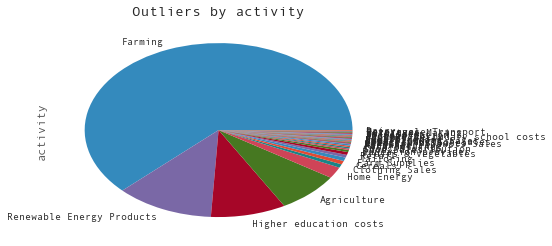

In [113]:
outliers['activity'].value_counts().plot(kind='pie',title='Outliers by activity')

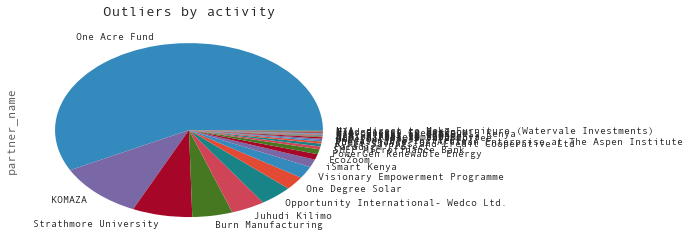

In [114]:
outliers['partner_name'].value_counts().plot(kind='pie',title='Outliers by activity')

## Let's go back to looking at sector

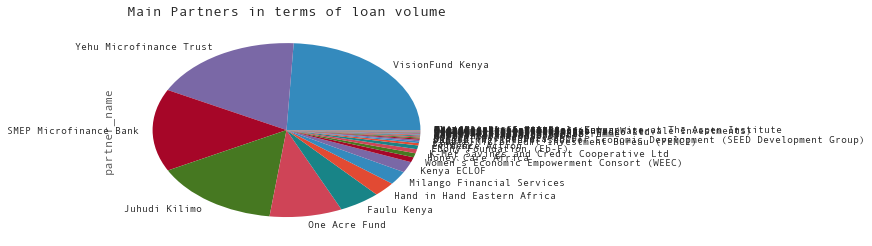

In [116]:
df['partner_name'].value_counts().plot(kind='pie',title='Main Partners in terms of loan volume')

In [117]:
df.groupby('partner_name')['loan_amount'].sum().nlargest(10)

partner_name
VisionFund Kenya               11960875
One Acre Fund                   9800175
Juhudi Kilimo                   8245775
Yehu Microfinance Trust         7774375
SMEP Microfinance Bank          7746150
Faulu Kenya                     2998575
Milango Financial Services      1440700
Kenya ECLOF                     1162850
Hand in Hand Eastern Africa     1059875
Evidence Action                  799950
Name: loan_amount, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

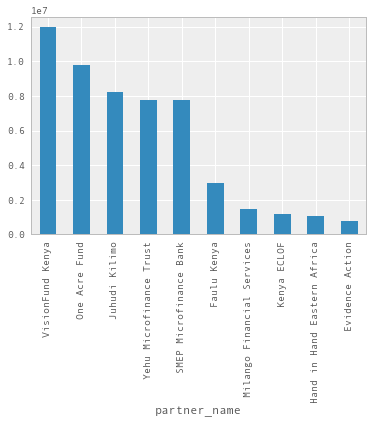

In [118]:
df.groupby('partner_name')['loan_amount'].sum().nlargest(10).plot(kind="bar")
plt.xticks(rotation=90)

In [50]:
df['partner_id'].dtype

dtype('float64')

In [51]:
df['partner_id_str']=df['partner_id'].astype('str')

In [38]:
df['partner_id_str']=str(df['partner_id'])

In [120]:
partner_sector=df.groupby(['partner_name', 'sector'])['loan_amount'].sum().unstack().reset_index()
partner_sector['total_count'] = partner_sector.sum(axis=1)
partner_sector.head(2)

sector,partner_name,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,total_count
0,Action Now: Kenya (ANK),7475.0,5950.0,7975.0,12450.0,NaN,3150.0,17975.0,4575.0,1450.0,3975.0,NaN,25050.0,35125.0,2150.0,NaN,127300.0
1,Asante Kenya Foundation,49800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49800.0


In [122]:
pd.crosstab(df["partner_name"],df["sector"],margins=True)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,All
partner_name,,,,,,,,,,,,,,,,
Action Now: Kenya (ANK),8,12,15,14,0,3,34,6,2,6,0,38,65,2,0,205
Asante Kenya Foundation,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152
Barefoot Power,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2
BrazAfric,0,0,0,0,0,0,0,0,0,0,1,11,0,0,0,12
Burn Manufacturing,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,44
Digital Divide Data (DDD),0,0,0,0,240,0,0,0,0,0,0,0,0,0,0,240
Ebony Foundation (Eb-F),139,11,115,6,1,0,278,4,1,12,0,157,94,15,0,833
EcoZoom,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,10
Evidence Action,0,0,0,0,0,0,0,519,0,0,0,0,0,0,0,519


In [129]:
def percConvert(ser):
  return ser/float(ser[-1])
top_15=df['partner_total_amount_raised'] is in df['partner_total_amount_raised'].nlargest(15)
pct_concentration=pd.crosstab(top_15["partner_name"],top_15["sector"],margins=True).apply(percConvert, axis=1)

In [142]:
top_15=df[df['partner_name'].isin(df['loan_amount'](df['partner_name']).sum().nlargest(15))]

In [143]:
top_15['partner_name'].unique()

array(['VisionFund Kenya'], dtype=object)

In [146]:
ds=df.groupby('partner_name')['loan_amount'].sum().nlargest(15)

In [148]:
type(ds)

pandas.core.series.Series

In [131]:
pct_concentration.reset_index()

sector,partner_name,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,All
0,Action Now: Kenya (ANK),0.066667,0.000000,0.066667,0.133333,0.000000,0.000000,0.133333,0.000000,0.000000,0.066667,0.000000,0.200000,0.266667,0.066667,0.000000,1.0
1,Asante Kenya Foundation,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,Barefoot Power,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
3,BrazAfric,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.916667,0.000000,0.000000,0.000000,1.0
4,Burn Manufacturing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
5,Digital Divide Data (DDD),0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
6,Ebony Foundation (Eb-F),0.000000,0.000000,0.466667,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000,0.000000,0.000000,0.200000,0.066667,0.000000,0.000000,1.0
7,EcoZoom,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
8,Evidence Action,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
9,Faulu Kenya,0.133333,0.000000,0.000000,0.000000,0.266667,0.066667,0.133333,0.066667,0.000000,0.000000,0.000000,0.066667,0.266667,0.000000,0.000000,1.0


In [128]:
len(pct_concentration.index)

54

In [138]:
pct_concentration[(pct_concentration.values > .7).any(1)]

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,All
partner_id_str,,,,,,,,,,,,,,,,
133.0,0.344942,0.005180,0.074169,0.029086,0.013791,0.001925,0.181939,0.006195,0.008260,0.009660,0.001925,0.172244,0.093700,0.055058,0.001925,1.0
138.0,0.145492,0.001767,0.084369,0.019601,0.006957,0.000607,0.226216,0.005798,0.010712,0.014908,0.037601,0.280216,0.113633,0.051516,0.000607,1.0
142.0,0.111787,0.009794,0.101317,0.025498,0.013171,0.002871,0.208544,0.017224,0.008781,0.030395,0.005066,0.241135,0.168693,0.049477,0.006248,1.0
156.0,0.819318,0.000000,0.000000,0.000221,0.021784,0.000000,0.075358,0.000000,0.000055,0.000111,0.076021,0.000442,0.001990,0.004478,0.000221,1.0
164.0,0.073853,0.006583,0.108809,0.009782,0.012796,0.001391,0.477237,0.002596,0.009828,0.002179,0.001205,0.195132,0.079462,0.018637,0.000510,1.0
202.0,0.999035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000965,0.000000,0.000000,0.000000,0.000000,1.0
203.0,0.134738,0.002675,0.093280,0.031093,0.015045,0.005015,0.260782,0.005684,0.010699,0.004681,0.007021,0.230358,0.139084,0.058509,0.001337,1.0
212.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
213.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.916667,0.000000,0.000000,0.000000,1.0


In [137]:
highly_concentrated.head(10)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,All
partner_id_str,,,,,,,,,,,,,,,,
133.0,0.344942,0.005180,0.074169,0.029086,0.013791,0.001925,0.181939,0.006195,0.008260,0.009660,0.001925,0.172244,0.093700,0.055058,0.001925,1.0
138.0,0.145492,0.001767,0.084369,0.019601,0.006957,0.000607,0.226216,0.005798,0.010712,0.014908,0.037601,0.280216,0.113633,0.051516,0.000607,1.0
142.0,0.111787,0.009794,0.101317,0.025498,0.013171,0.002871,0.208544,0.017224,0.008781,0.030395,0.005066,0.241135,0.168693,0.049477,0.006248,1.0
156.0,0.819318,0.000000,0.000000,0.000221,0.021784,0.000000,0.075358,0.000000,0.000055,0.000111,0.076021,0.000442,0.001990,0.004478,0.000221,1.0
164.0,0.073853,0.006583,0.108809,0.009782,0.012796,0.001391,0.477237,0.002596,0.009828,0.002179,0.001205,0.195132,0.079462,0.018637,0.000510,1.0
202.0,0.999035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000965,0.000000,0.000000,0.000000,0.000000,1.0
203.0,0.134738,0.002675,0.093280,0.031093,0.015045,0.005015,0.260782,0.005684,0.010699,0.004681,0.007021,0.230358,0.139084,0.058509,0.001337,1.0
212.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
213.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.916667,0.000000,0.000000,0.000000,1.0


In [136]:
len(highly_concentrated.index)

54

In [118]:
partner_sector.head(2)

sector,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,total_count
partner_id_str,,,,,,,,,,,,,,,,
133.0,3890950.0,56525.0,901500.0,344125.0,189825.0,25625.0,1957100.0,85775.0,142375.0,125350.0,20925.0,2205000.0,1130575.0,853550.0,31675.0,11960875.0
138.0,1115225.0,13050.0,686675.0,166875.0,71100.0,3550.0,1641750.0,49350.0,78250.0,124000.0,184375.0,2325450.0,884125.0,397300.0,5075.0,7746150.0


In [ ]:
## to-do, concentration by industry, by sex and by location

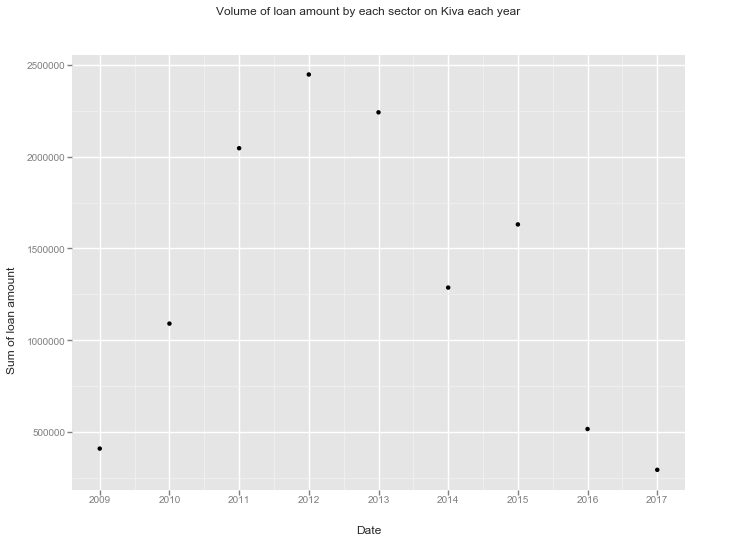

<ggplot: (-9223372036564374314)>

In [111]:
ts=df[['posted_year','partner_id_str', 'loan_amount']]
ts=ts.groupby(['posted_year','partner_id_str'])['loan_amount'].sum().unstack().reset_index()


ggplot(ts , aes(x = 'posted_year', y = '133.0')) + geom_point() + \
ggtitle("Volume of loan amount by each sector on Kiva each year") + xlab("Date") + ylab("Sum of loan amount")

In [89]:
cols = ['plant1_type','plant2_type','city2']
df.set_index(cols).groupby(level=cols)['p234_r_c'].\
    nlargest(1).reset_index()

partner_id_str,posted_year,133.0,138.0,142.0,156.0,164.0,202.0,203.0,212.0,213.0,218.0,24.0,25.0,257.0,258.0,259.0,262.0,27.0,272.0,276.0,277.0,282.0,286.0,32.0,322.0,324.0,336.0,340.0,341.0,345.0,350.0,36.0,385.0,386.0,388.0,397.0,405.0,412.0,436.0,447.0,466.0,469.0,473.0,477.0,491.0,500.0,502.0,505.0,512.0,520.0,526.0,6.0,92.0,nan
0,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,76.0,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.0,NaN,NaN
1,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,687.0,NaN,NaN,NaN,NaN,291.0,NaN,NaN,NaN,NaN,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,695.0,5.0,NaN
2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,70.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN
3,2009,760.0,168.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,2255.0,550.0,1360.0,934.0,720.0,NaN,NaN,NaN,NaN,NaN,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011,4886.0,876.0,2261.0,1292.0,2817.0,881.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
6,2012,5714.0,1616.0,1838.0,1183.0,3678.0,343.0,1237.0,NaN,2.0,34.0,NaN,NaN,11.0,20.0,NaN,NaN,NaN,11.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.0
7,2013,4265.0,2091.0,93.0,1078.0,4330.0,699.0,1421.0,1.0,5.0,31.0,NaN,NaN,47.0,53.0,NaN,3.0,NaN,51.0,5.0,469.0,155.0,5.0,NaN,5.0,168.0,174.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1077.0
8,2014,2999.0,3314.0,NaN,2005.0,3596.0,925.0,180.0,1.0,5.0,2.0,NaN,NaN,26.0,81.0,90.0,3.0,NaN,NaN,NaN,430.0,76.0,NaN,NaN,19.0,245.0,10.0,3.0,4.0,NaN,NaN,NaN,18.0,77.0,366.0,NaN,15.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4725.0
9,2015,5042.0,3962.0,NaN,3521.0,2824.0,1897.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,81.0,NaN,8.0,NaN,NaN,10.0,10.0,NaN,1.0,NaN,39.0,106.0,NaN,3.0,6.0,NaN,1.0,NaN,NaN,62.0,1440.0,5.0,13.0,1.0,42.0,46.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3465.0


In [ ]:
sp.plot('sector', 'loan_amount', kind='bar', by=partner_id)

In [22]:
df['sector'].value_counts()

Agriculture       47568
Food              26554
Retail            19722
Services          10959
Clothing           9193
Transportation     3841
Personal Use       2365
Construction       1896
Education          1833
Health             1314
Manufacturing       889
Housing             800
Arts                754
Entertainment       136
Wholesale           134
Name: sector, dtype: int64

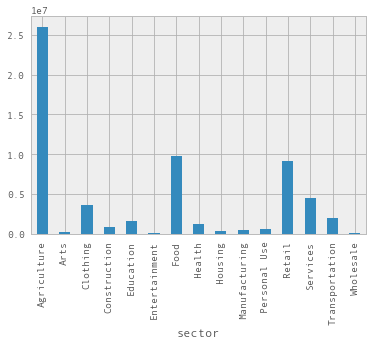

In [24]:
df.groupby('sector')['loan_amount'].sum().plot(kind="bar")

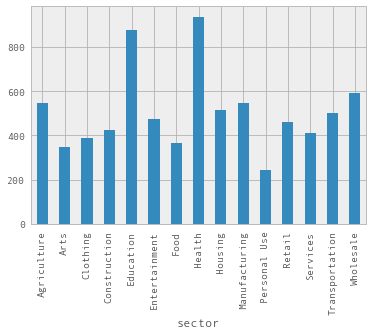

In [25]:
df.groupby('sector')['loan_amount'].mean().plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c603320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12aa4c470>]], dtype=object)

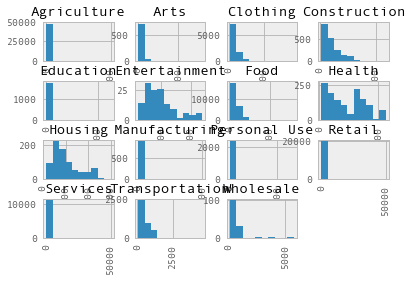

In [73]:
df['loan_amount'].hist(by=df['sector'])

### Looking at the gender of the borrower

In the cell below we create a gender marker for loans that have only a single borrower.

In [27]:
df['gender']=np.where(df['borrowers'].apply(lambda x: x.split("gender': '")[1][0]=='M'),"Male","Female")

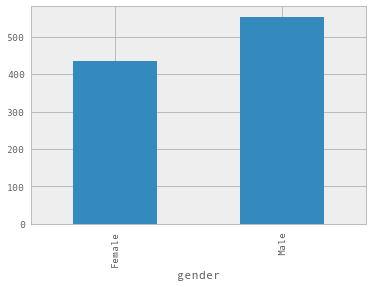

In [28]:
df.groupby('gender')['loan_amount'].mean().plot(kind="bar")

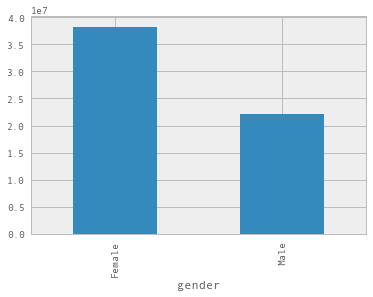

In [29]:
df.groupby('gender')['loan_amount'].sum().plot(kind="bar")

There are alot of outliers, figure out what is going on.

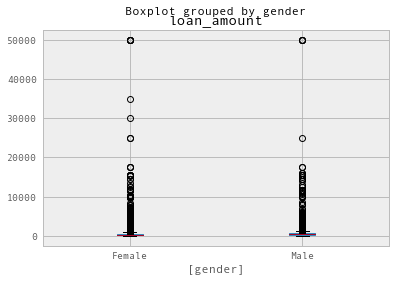

In [59]:
df.boxplot(column=['loan_amount'], by=['gender'])

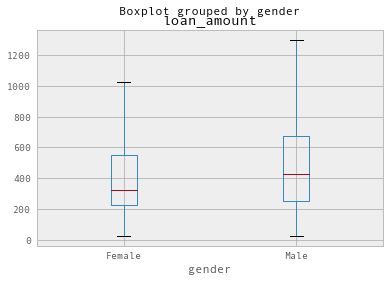

In [89]:
df.boxplot(column='loan_amount', by='gender', showfliers=False)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

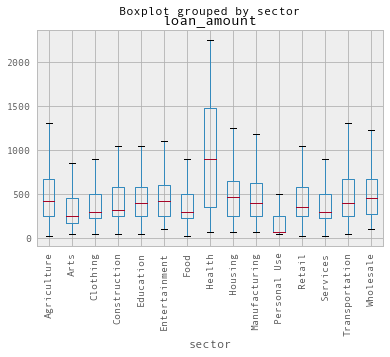

In [90]:
df.boxplot(column='loan_amount', by='sector', showfliers=False)
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 30 Text xticklabel objects>)

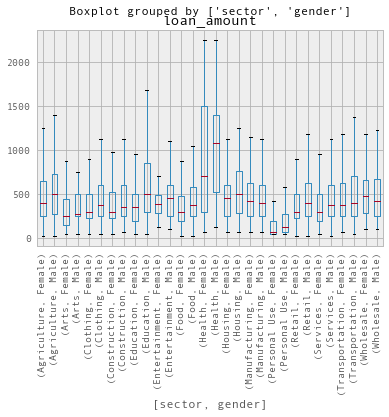

In [87]:
df.boxplot(column=['loan_amount'], by=['sector','gender'], showfliers=False)
plt.xticks(rotation=90)

gender,sector,Female,Male,total_count,pct_female
0,Agriculture,30761,16807,47568,0.646674
1,Arts,618,136,754,0.819629
2,Clothing,7844,1349,9193,0.853258
3,Construction,642,1254,1896,0.338608
4,Education,1275,558,1833,0.695581


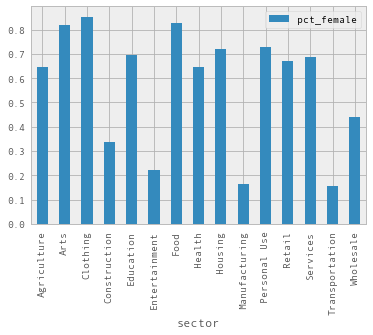

In [118]:
sector_by_gender = df.groupby(['sector','gender']).size().unstack().reset_index()
sector_by_gender['total_count'] = (sector_by_gender['Male'] + sector_by_gender['Female'])
sector_by_gender['pct_female'] = sector_by_gender['Female'] / sector_by_gender['total_count']
sector_by_gender[:5]   

sector_by_gender.plot('sector', 'pct_female', kind='bar')
sector_by_gender.plot()

In [ ]:
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

In [119]:
grouped =  df['loan_amount'].groupby([df['sector'],df['gender']])
grouped = grouped.agg([np.sum, np.mean, np.std, np.size]).reset_index()
grouped[:5]

,sector,gender,sum,mean,std,size
0,Agriculture,Female,15803250,513.743051,663.849287,30761
1,Agriculture,Male,10225075,608.381924,698.090331,16807
2,Arts,Female,207550,335.841424,377.555823,618
3,Arts,Male,53200,391.176471,246.146776,136
4,Clothing,Female,2971575,378.834141,258.132191,7844


In [ ]:
sector_by_gender['total_count'] = (sector_by_gender['Male'] + sector_by_gender['Female'])
sector_by_gender['pct_female'] = sector_by_gender['Female'] / sector_by_gender['total_count']
sector_by_gender[:5]   

df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

In [ ]:
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})

In [88]:
sector_by_gender = df.groupby(['partner_id']).size().unstack().reset_index()
sector_by_gender['total_count'] = (sector_by_gender['Male'] + sector_by_gender['Female'])
sector_by_gender['pct_female'] = sector_by_gender['Female'] / sector_by_gender['total_count']
sector_by_gender['total_count'] = (sector_by_gender['Male'] + sector_by_gender['Female'])
sector_by_gender['pct_female'] = sector_by_gender['Female'] / sector_by_gender['total_count']
sector_by_gender.sort_values('pct_female', ascending=False) 
sector_by_gender[:5]   

AttributeError: 'Float64Index' object has no attribute 'labels'

Now let's start doing some exploratory analysis.

In [ ]:
ggplot(ts , aes(x = 'Date', y = 'loan_amount')) + geom_point(color = "blue") + \
ggtitle("Volume of loan amount on Kiva each year") + xlab("Date") + ylab("Sum of loan amount")

In [276]:
df['gender'].describe()

count     127958
unique         2
top       Female
freq       87887
Name: gender, dtype: object

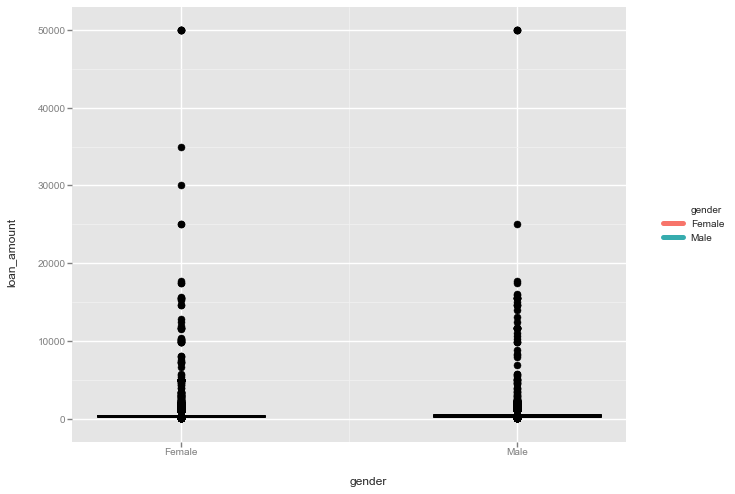

<ggplot: (-9223372036442052839)>

In [282]:
ggplot( aes(x = 'gender', y = 'loan_amount', fill='gender'), data = single_borrow) + geom_boxplot()

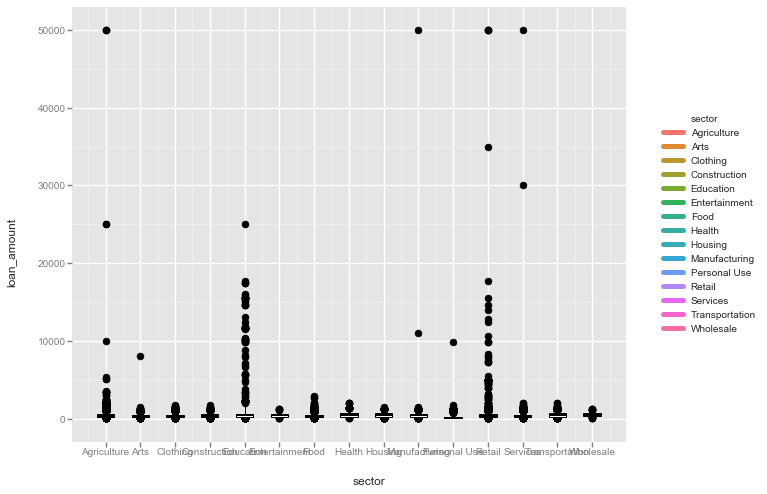

<ggplot: (-9223372036479649662)>

In [348]:
ggplot( aes(x = 'sector', y = 'loan_amount', fill='sector'), data = single_borrow) + geom_boxplot()

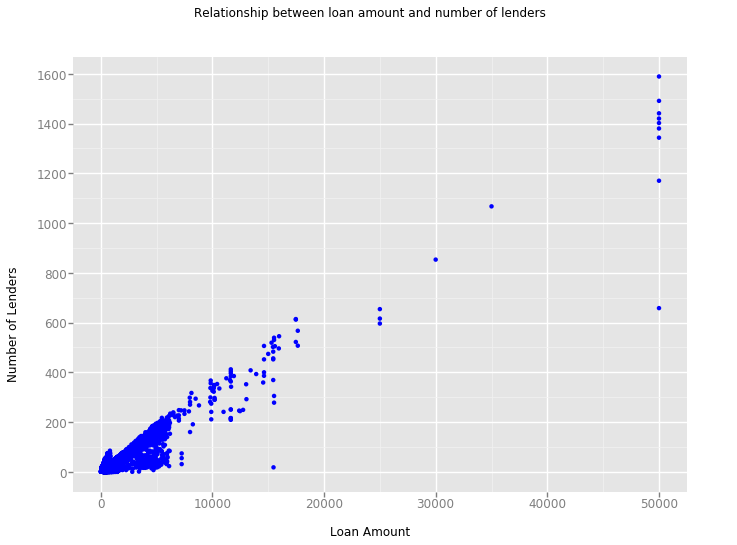

<ggplot: (-9223372036560720040)>

In [107]:
ggplot(loans_full , aes(x = 'loan_amount', y = 'lender_count')) + geom_point(color = "blue") + \
ggtitle("Relationship between loan amount and number of lenders") + xlab("Loan Amount") + ylab("Number of Lenders")

As you can see in the plot above, there is a fairly intuitive linear relationship between loan amount and number of lenders. This suggests KIVA lenders are giving similar, small sized donations so that larger loans need more lenders in order to fulfill them.